# pandas入门

In [3]:
import numpy as np
import pandas as pd

#Series  DataFrame  DataFrame 的一些简单运用


s = pd.Series([1,3,6,np.nan,44,1])  #生成一个有序号的一维数组
print(s)


dates = pd.date_range('20180723',periods=6)   #顺序生成6个时间的一维数组
print(dates)


0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64
DatetimeIndex(['2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
               '2018-07-27', '2018-07-28'],
              dtype='datetime64[ns]', freq='D')


In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
#       二维矩阵        随机生成          行索引      列索引
print(df)

#DataFrame 的矩阵 可以用dict生成,也可以用np导入:

df1 = pd.DataFrame(np.arange(12).reshape((3,4)))#不带索引参数时  默认数字索引
print(df1)

df2 = pd.DataFrame({'A':[1,2,3],'B':pd.Series([1,3,np.nan]),'C':np.arange(3)})  #A,B,C对应一列
print(df2)



                   a         b         c         d
2018-07-23 -0.393627 -1.682663  0.844865 -0.962597
2018-07-24 -0.724063  0.403086 -0.054093  0.680831
2018-07-25  0.663759  0.515005  0.386982  1.290267
2018-07-26  1.261147 -0.075909  0.332821  0.132250
2018-07-27  0.231117  0.752072  0.694438 -0.528140
2018-07-28 -0.267725  0.920049 -0.751937 -0.094020
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
   A    B  C
0  1  1.0  0
1  2  3.0  1
2  3  NaN  2


In [7]:
print(df2.index)  #行名字
print(df2.columns)  #列名字
print(df2.values)   #矩阵内容
print(df2.describe()) #describe()  数学运算描述
# print(df2.T)   #矩阵转置
print(df2.sort_index(axis=0,ascending=False))  #axis = 1 对横坐标索引进行排序,反序
print(df2.sort_values(by='A'))  #对某索引进行排序


RangeIndex(start=0, stop=3, step=1)
Index(['A', 'B', 'C'], dtype='object')
[[  1.   1.   0.]
 [  2.   3.   1.]
 [  3.  nan   2.]]
         A         B    C
count  3.0  2.000000  3.0
mean   2.0  2.000000  1.0
std    1.0  1.414214  1.0
min    1.0  1.000000  0.0
25%    1.5  1.500000  0.5
50%    2.0  2.000000  1.0
75%    2.5  2.500000  1.5
max    3.0  3.000000  2.0
   A    B  C
2  3  NaN  2
1  2  3.0  1
0  1  1.0  0
   A    B  C
0  1  1.0  0
1  2  3.0  1
2  3  NaN  2


# 选择数据

In [9]:
import numpy as np
import pandas as pd

dates = pd.date_range('20180724',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['A','B','C','D'])

print(df)


             A   B   C   D
2018-07-24   0   1   2   3
2018-07-25   4   5   6   7
2018-07-26   8   9  10  11
2018-07-27  12  13  14  15
2018-07-28  16  17  18  19
2018-07-29  20  21  22  23


In [10]:
#开始选择
print(df['A'],df.A)  #选择某序列
print(df[0:3],df['20180724':'20180726'])  #切片选择0:3行的数据  #切片选择序列()的数据

2018-07-24     0
2018-07-25     4
2018-07-26     8
2018-07-27    12
2018-07-28    16
2018-07-29    20
Freq: D, Name: A, dtype: int32 2018-07-24     0
2018-07-25     4
2018-07-26     8
2018-07-27    12
2018-07-28    16
2018-07-29    20
Freq: D, Name: A, dtype: int32
            A  B   C   D
2018-07-24  0  1   2   3
2018-07-25  4  5   6   7
2018-07-26  8  9  10  11             A  B   C   D
2018-07-24  0  1   2   3
2018-07-25  4  5   6   7
2018-07-26  8  9  10  11


In [12]:
#select by label:                                    loc [ ] 纯标签筛选
print(df.loc['20180724'])   #使用loc后缀更具体的选取
print(df.loc['20180724',['A','B']])  #选择具体的数据

A    0
B    1
C    2
D    3
Name: 2018-07-24 00:00:00, dtype: int32
A    0
B    1
Name: 2018-07-24 00:00:00, dtype: int32


In [18]:
#selec by position:                                  iloc[ ]纯序列筛选   
print(df.iloc[[1,3,5],1:3])  #使用数字序号索引筛选


             B   C
2018-07-25   5   6
2018-07-27  13  14
2018-07-29  21  22


In [22]:
# mixed selection:                                    ix  [ ]   混合筛选
print(df.ix[:3,['A','C']])

            A   C
2018-07-24  0   2
2018-07-25  4   6
2018-07-26  8  10


In [16]:
#Boolean indexing:                                   布尔值筛选
print(df[df.A>8])  #在A中对比,大于8的数据

             A   B   C   D
2018-07-27  12  13  14  15
2018-07-28  16  17  18  19
2018-07-29  20  21  22  23


# 设置数据

In [ ]:
import numpy as np
import pandas as pd

dates = pd.date_range('20180724',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['A','B','C','D'])

print(df)

# df.iloc[0,1] = 111
# df.loc['20180724','C'] = 222                        #使用loc可以用索引定位

# df[df.A>4] = 0      #改变df
# df.A[df.A>4] = 1  #改变A列

# df['F'] = np.nan    #增加一列F
df['F'] = pd.Series([1,2,3,4,5,6],index=pd.date_range('20180724',periods=6))  #对应的添加一列数据
# print(df)
df


# 处理丢失值

In [28]:
import numpy as np
import pandas as pd

dates = pd.date_range('20180724',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['A','B','C','D'])

df.iloc[0,1] = np.nan   #假设丢失数据
df.iloc[1,2] = np.nan

#打印创造的矩阵: 
print(df)

print(df.dropna(axis=0,how='any'))      #丢掉有丢失数据的行/列    how='all'全部错误才丢掉

print(df.fillna(value = 0))             #填入丢失的数据 为0

print(df.isnull())                     #返回是否丢失数据的矩阵
print(np.any(df.isnull()) == True)     #返回是否丢失数据


             A     B     C   D
2018-07-24   0   NaN   2.0   3
2018-07-25   4   5.0   NaN   7
2018-07-26   8   9.0  10.0  11
2018-07-27  12  13.0  14.0  15
2018-07-28  16  17.0  18.0  19
2018-07-29  20  21.0  22.0  23
             A     B     C   D
2018-07-26   8   9.0  10.0  11
2018-07-27  12  13.0  14.0  15
2018-07-28  16  17.0  18.0  19
2018-07-29  20  21.0  22.0  23
             A     B     C   D
2018-07-24   0   0.0   2.0   3
2018-07-25   4   5.0   0.0   7
2018-07-26   8   9.0  10.0  11
2018-07-27  12  13.0  14.0  15
2018-07-28  16  17.0  18.0  19
2018-07-29  20  21.0  22.0  23
                A      B      C      D
2018-07-24  False   True  False  False
2018-07-25  False  False   True  False
2018-07-26  False  False  False  False
2018-07-27  False  False  False  False
2018-07-28  False  False  False  False
2018-07-29  False  False  False  False
True


# 导入导出

In [30]:
import pandas as pd

data = pd.read_excel(r'E:\办公\班级信息\计科本171旷课统计.xlsx')

print(data)

#data.to_csv(r'C:\Users\Administrator\Desktop\下载\1.csv')

   2018年春季学期旷课统计 Unnamed: 1  Unnamed: 2 Unnamed: 3
0             班级         姓名          学号     第3周旷课数
1         计科本171        谢智鑫  1704405102          0
2         计科本171        黄映兰  1704405103          0
3         计科本171        韩旭昕  1704405104          0
4         计科本171        黄春燕  1704405105          0
5         计科本171        张诗圆  1704405106          0
6         计科本171        梁雅丽  1704405107          0
7         计科本171        黄家濠  1704405108          0
8         计科本171         罗强  1704405109          0
9         计科本171        陈庆浪  1704405110          0
10        计科本171        谭雯宇  1704405111          0
11        计科本171        李秋枫  1704405112          0
12        计科本171        张伟鹏  1704405113          0
13        计科本171        杨福娟  1704405114          0
14        计科本171        陈韵春  1704405115          0
15        计科本171         刘梅  1704405116          0
16        计科本171         黄真  1704405117          1
17        计科本171        黎洪向  1704405118          0
18        计科本171        洪宏声  17

# 合并concat

In [ ]:
# import numpy as np
import pandas as pd


# #第一个例子 (横坐标相同)
# df1 = pd.DataFrame(np.zeros((3,4)),columns=['a','b','c','d'])
# df2 = pd.DataFrame(np.ones((3,4)),columns=['a','b','c','d'])
# df3 = pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
# print(df1)
# print(df2)
# print(df3)

# #上下合并
# res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)  #忽略index纵坐标,重新排序
# print(res)


#第二个例子  (横纵坐标都不同)
df1 = pd.DataFrame(np.zeros((3,4)),columns=['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4)),columns=['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2)
# res = pd.concat([df1,df2],join='inner',ignore_index=True)  #join默认使用outer模式,求并集,不存在的用nan填充  inner,求交集
res = pd.concat([df1,df2],axis=1,join_axes=[df1.index])   #join_axes 选择需要处理的行index
res


#第三个例子:  append添加到末尾
# df1 = pd.DataFrame(np.zeros((3,4)),columns=['a','b','c','d'])
# df2 = pd.DataFrame(np.ones((3,4)),columns=['a','b','c','d'])
# df3 = pd.DataFrame(np.ones((3,4)),columns=['a','b','c','d'])

# # res = df1.append([df2,df3],ignore_index=True)  #全部加起来
# s1 = pd.Series([1,2,3,4],index=['a','b','c','d'])
# res = df1.append(s1,ignore_index=True)
# print(res)

# 合并merge


In [34]:
import numpy as np
import pandas as pd


#依据一组key合并:
# left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
#                       'A': ['A0', 'A1', 'A2', 'A3'],
#                       'B': ['B0', 'B1', 'B2', 'B3']})

# right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
#                        'C': ['C0', 'C1', 'C2', 'C3'],
#                        'D': ['D0', 'D1', 'D2', 'D3']})

# print(left)
# print(right)
# res =  pd.merge(left,right,on='key')
# print(res)


#依据两组key合并 :
# left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
#                       'key2': ['K0', 'K1', 'K0', 'K1'],
#                       'A': ['A0', 'A1', 'A2', 'A3'],
#                       'B': ['B0', 'B1', 'B2', 'B3']})

# right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
#                        'key2': ['K0', 'K0', 'K0', 'K0'],
#                        'C': ['C0', 'C1', 'C2', 'C3'],
#                        'D': ['D0', 'D1', 'D2', 'D3']})

# print(left)
# print(right)
# # how = {'left','right','outer','inner'}  #left基于第一个的key对ab进行填充,right第二个.默认inner,outer取补集
# res = pd.merge(left,right,on=['key1','key2'])                     #key1，key2相同的交集合并
# res1 = pd.merge(left,right,on=['key1','key2'],how='outer')        #key1，key2相同的并集合并
# print(res)
# print(res1)



#  Indicator 显示合并的情况

# df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
# df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

# print(df1)
# print(df2)
# res = pd.merge(df1,df2,on='col1',how='outer',indicator=True)  #indicaor 显示合并情况
# print(res)


# 依据index合并
# left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
#                      'B': ['B0', 'B1', 'B2']},
#                     index=['K0', 'K1', 'K2'])

# right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
#                       'D': ['D0', 'D2', 'D3']},
#                      index=['K0', 'K2', 'K3'])

# print(left)
# print(right)
# res = pd.merge(left,right,left_index=True,right_index=True,how='outer')  #根据left/right的index来作为key进行合并，而不是默认的columns
# print(res)



# #解决over lapping的问题
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)
res = pd.merge(boys,girls,on='k',suffixes=['_boys','_girls'])  #用suffixs,添加后缀 区别key相同，但相同值不同意义的数据
print(res)

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    4  K0
1    5  K0
2    6  K3
   age_boys   k  age_girls
0         1  K0          4
1         1  K0          5


# 可视化

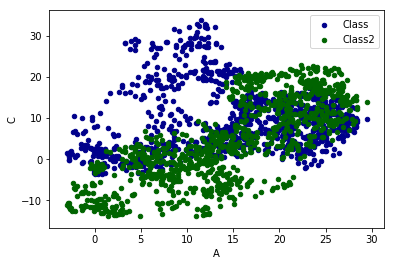

In [35]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

#Series
# data = pd.Series(np.random.randn(1000))
# data = data.cumsum()

#DataFrame
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list("ABCD"))
data = data.cumsum()
# print(data.head(5))   #输出矩阵前5个数据

# data.plot()
# plt.show()

#plot method
# 'bar':条形图，'hist','box'......

#散点图：
ax =data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class')
data.plot.scatter(x='A',y='C',color='DarkGreen',label='Class2',ax=ax)
plt.show()